In [1]:
from pathlib import Path
import wordcloud
from pyspark.sql import SparkSession
from pyspark import SparkConf

'''
spark = SparkSession.builder \
        .master("yarn") \
        .appName("HelloLines") \
        .getOrCreate()
sc = spark.sparkContext
rdd = sc.textFile("hdfs:/user/cunha/hello.txt")
'''

spark = SparkSession \
  .builder \
  .enableHiveSupport() \
  .config(conf=SparkConf().set("spark.driver.maxResultSize", "2g")) \
  .appName("test") \
  .getOrCreate()

path = "./out/"
df = spark.read.csv(path)
df.show()

22/05/13 19:53:04 WARN Utils: Your hostname, acer resolves to a loopback address: 127.0.1.1; using 192.168.0.40 instead (on interface wlp4s0)
22/05/13 19:53:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/13 19:53:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-------------------+------+--------------------+
|                _c0|   _c1|                 _c2|
+-------------------+------+--------------------+
|              31mar|  1264|laacademia,islr,d...|
|            31marzo|  1625|humanpills,govern...|
|      aprilfoolsday|  1334|bbb2o2o,bioterror...|
|           breaking|  1702|vijayabaskar,tds,...|
|           business|  1134|prepare,eidl,uplo...|
|            cdnpoli|  1005|cdninnovation,pol...|
|              china|  4516|cancel,padua,from...|
|       chinesevirus|  1396|tds,covidusa,gove...|
|        confinement|  3910|poeme,tds,illumin...|
|  confinementjour15|  1757|vraioufake,vieuxp...|
|             corona| 12223|srmd,enquantoisso...|
|        coronaalert|  1069|gtasanandreas,cov...|
|        coronajihad|  1341|deletetiktok,smar...|
|     coronalockdown|  2861|authoritarianism,...|
|       coronaupdate|  2447|ccc,belarus,biote...|
|            coronav|  2928|direitodotrabalho...|
|        coronavirus|277648|undermining,porta...|


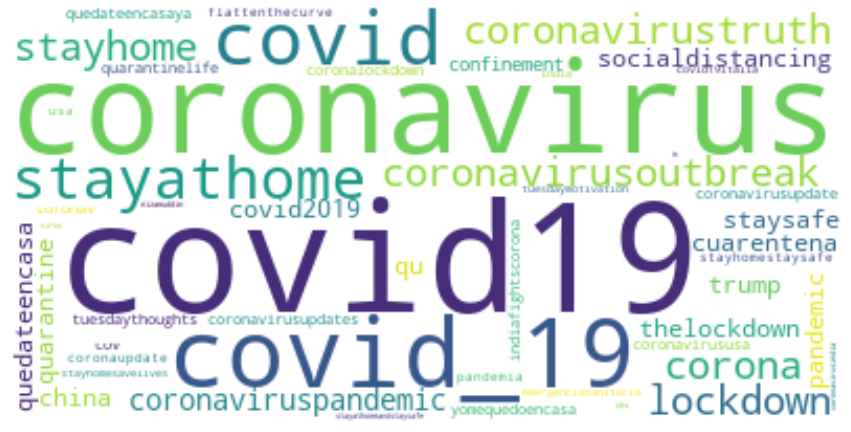

In [5]:
# 1.1
import multidict
import matplotlib.pyplot as plt
import math

word_cloud_dict = multidict.MultiDict()
degrees_histogram = []
data_collect = df.rdd.toLocalIterator()
for row in data_collect:
    # 1.1
    word_cloud_dict.add(str(row._c0), math.log2(int(row._c1)))
    #1.2
    degrees_histogram.append((row._c0, row._c2.count(",")+1 if len(row._c2) > 0 else 0))
    

wc = wordcloud.WordCloud(background_color="white", max_words=50)
wc.generate_from_frequencies(word_cloud_dict)
plt.figure(figsize=(15, 20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

[2466, 2532, 2534, 2535, 2562, 2765, 2778, 2828, 2863, 2880, 2890, 2897, 3062, 3215, 3324, 3331, 3379, 3420, 3540, 3801, 3819, 3830, 4009, 4085, 4090, 4391, 4537, 4715, 4975, 5052, 5524, 5735, 6405, 6945, 7212, 8173, 8612, 9104, 9504, 9595, 10226, 10540, 12076, 14157, 16076, 17482, 19761, 34659, 109776, 140086]


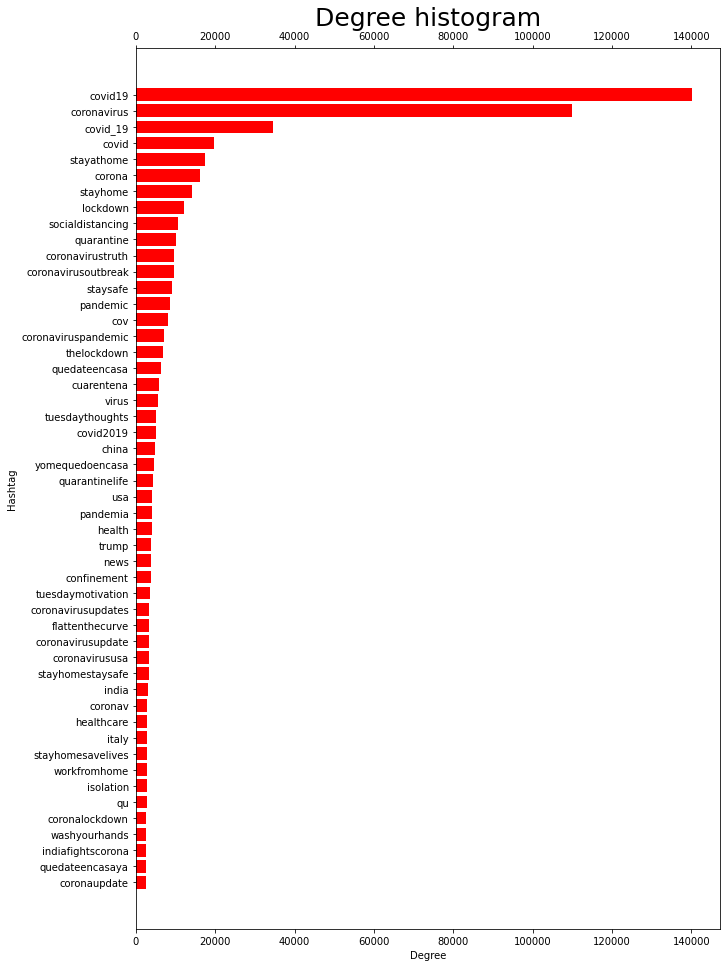

In [6]:
import numpy as np
# 1.2    
degrees_histogram.sort(key=lambda tup: tup[1], reverse=True)

small_histogram = [freq for (_, freq) in degrees_histogram[:50]][::-1]
names = [name for (name, _) in degrees_histogram[:50]][::-1]
print(small_histogram)
indices = np.arange(len(small_histogram))
plt.figure(figsize=(10, 13))
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.barh(indices, small_histogram, color='r', height=0.8)
plt.yticks(indices, names, rotation='horizontal')
plt.tight_layout()
plt.title('Degree histogram', fontsize=25)
plt.xlabel('Degree')
plt.ylabel('Hashtag')
plt.show()


In [97]:
spark.stop()